# Introduction to Linear Regression Using Gradient Descent

Linear Regression Using Gradient Descent is a fundamental algorithm in the field of machine learning, specifically in the domain of supervised learning. It is commonly used for solving regression problems, where the goal is to predict a continuous target variable based on input features by fitting a linear model.

## What is Linear Regression?

Linear Regression is a type of linear model that aims to find the best-fitting linear relationship between the input features (independent variables) and the target variable (dependent variable). The linear model is defined by a set of weights (coefficients) that are learned from the training data.

## How Does Linear Regression Work?

The Linear Regression algorithm works as follows:
1. **Initialization**: Initialize the model's weights (coefficients) randomly or with some initial values.
2. **Prediction**: Compute the predicted values by taking a linear combination of the input features and weights.
3. **Loss Calculation**: Calculate a loss or error metric that quantifies the difference between the predicted values and the actual target values.
4. **Gradient Descent**: Update the weights iteratively using a gradient descent optimization algorithm to minimize the loss.
5. **Convergence**: Repeat steps 2-4 until the algorithm converges to a set of weights that result in minimal loss.

## Benefits of Linear Regression

- **Interpretability**: Linear regression provides interpretable coefficients, allowing us to understand the impact of each feature on the target.
- **Simplicity**: It is a straightforward and easy-to-understand algorithm, making it a good choice for initial model exploration.
- **Versatility**: Linear regression can be extended to handle more complex scenarios, such as multiple regression and regularization.

## Linear Regression Implementation

Let's begin by importing the necessary packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme with a specific style and palette
sns.set_theme(style="whitegrid", palette="pastel")

## Dataset Overview

In this section, we will be working with a dataset that focuses on CO2 emissions from various car models, incorporating different properties of the cars. This dataset is particularly relevant as it offers insights into the environmental impact of different vehicles, a critical aspect in the era of climate change awareness.

### Data Source

The dataset is compiled from Canadian sources and encompasses a range of car properties including make, model, fuel type, and engine size. Such comprehensive data allows for a analysis of factors contributing to CO2 emissions. The dataset can be found at [this link](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles).

In [10]:
# Import the data - CO2 emissions based on car model and other car properties (Canadian Data)
emissions_df = pd.read_csv("Data/CO2_Emissions_Canada.csv")

# Rename entries that will be used
emissions_df = emissions_df.rename(columns={
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption',
    'CO2 Emissions(g/km)': 'Emissions'
})

# Find instances of cars with 4 cylinders
emissions_df = emissions_df[emissions_df['Cylinders'] == 4]

# Slice the first 50 points to be used
emissions_df = df_4_cylinders.iloc[:50]

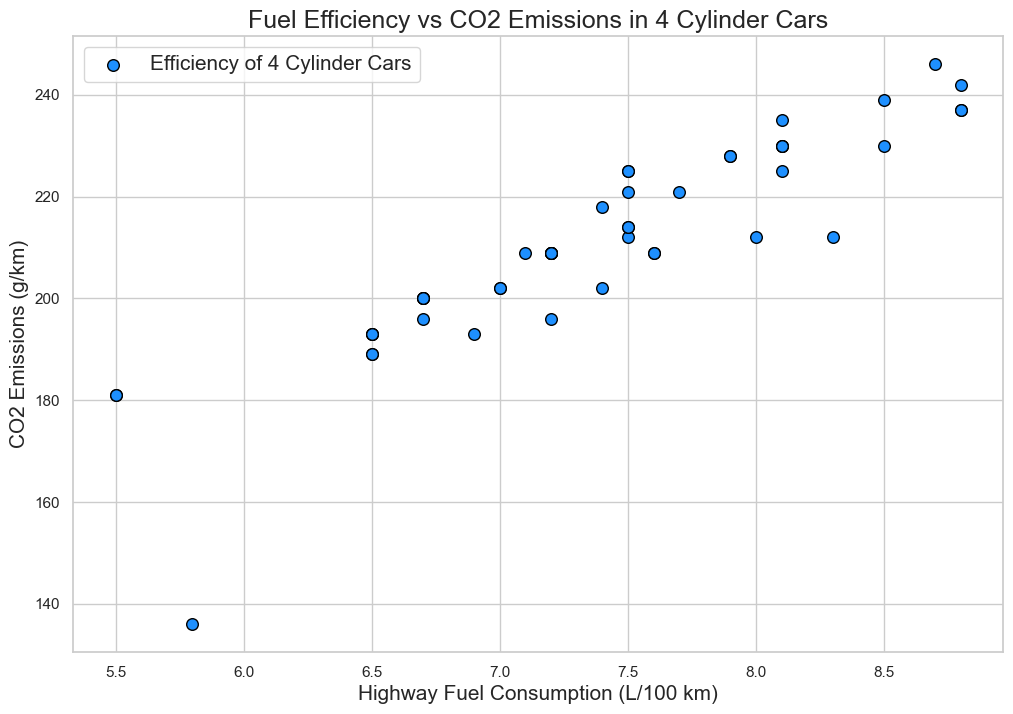

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(emissions_df['Fuel_Consumption'], 
            emissions_df['Emissions'], 
            color="dodgerblue", 
            label="Efficiency of 4 Cylinder Cars",
            edgecolor='black', 
            s=70) 

plt.xlabel("Highway Fuel Consumption (L/100 km)", fontsize=15)
plt.ylabel("CO2 Emissions (g/km)", fontsize=15)
plt.legend(fontsize=15, loc='upper left') 
plt.title("Fuel Efficiency vs CO2 Emissions in 4 Cylinder Cars", fontsize=18)  
plt.grid(True) 

plt.show()



Overall, there is a noticeable linear trend: as highway fuel consumption increases, CO2 emissions also tend to increase. There are a couple noticeable outliers.


In [12]:
# Find X and y vectors for use in the Linear Regression
X = emissions_df.Fuel_Consumption.values
X = X.reshape(-1, 1)
y = emissions_df.Emissions.values

## Create the Linear Regression with Gradient Descent Model

In [30]:
class GradientDescent:
    def __init__(self, activation_function=lambda x: x):
        self.activation_function = activation_function
        self.w_ = None
        self.errors_ = []

    def fit(self, X, y, alpha=0.001, epochs=50):
        # Initialize weights to small random numbers and bias to 0
        self.w_ = np.random.rand(X.shape[1] + 1) * 0.01

        # Stochastic Gradient Descent
        for _ in range(epochs):
            sum_errors = 0
            for xi, target in zip(X, y):
                # Update rule for stochastic gradient descent
                output = self.activation_function(np.dot(xi, self.w_[:-1]) + self.w_[-1])
                error = (target - output)
                self.w_[:-1] += alpha * xi * error
                self.w_[-1] += alpha * error

                sum_errors += (error ** 2) / 2

            # Mean Squared Error
            self.errors_.append(sum_errors / len(X))

    def predict(self, X):
        return self.activation_function(np.dot(X, self.w_[:-1]) + self.w_[-1])


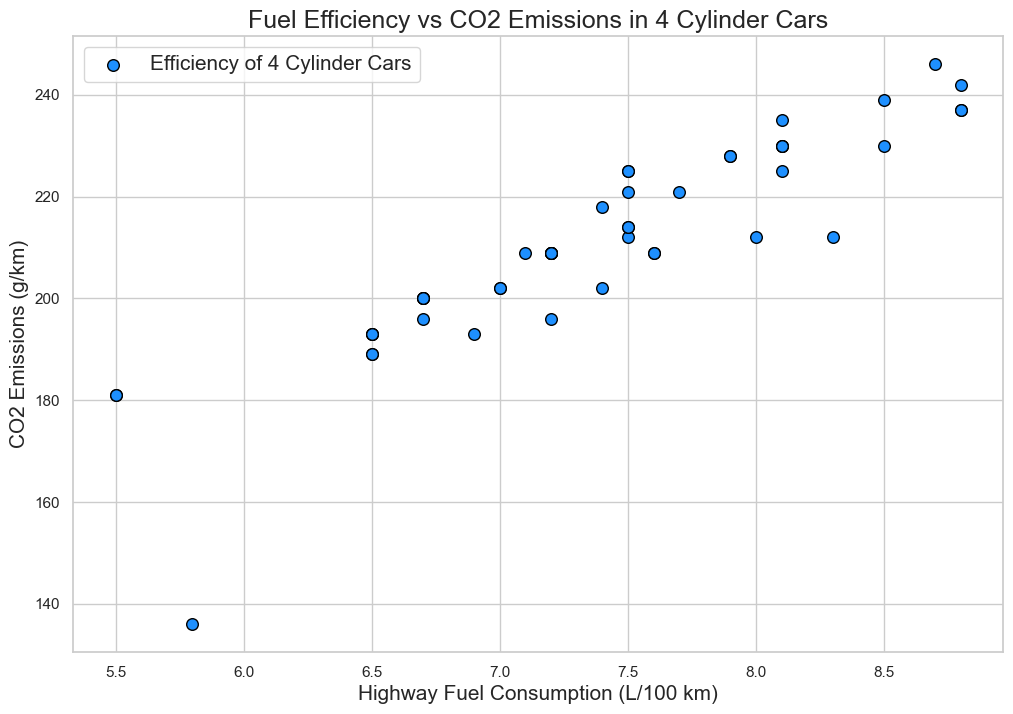

In [34]:
plt.figure(figsize=(12, 8))
plt.scatter(X, 
            y, 
            color="dodgerblue", 
            label="Efficiency of 4 Cylinder Cars",
            edgecolor='black', 
            s=70) 

plt.xlabel("Highway Fuel Consumption (L/100 km)", fontsize=15)
plt.ylabel("CO2 Emissions (g/km)", fontsize=15)
plt.legend(fontsize=15, loc='upper left') 
plt.title("Fuel Efficiency vs CO2 Emissions in 4 Cylinder Cars", fontsize=18)  
plt.grid(True) 

plt.show()


The graph above, generated using the variables `X` and `y`, accurately matches the previously described graph. This confirms that `X` and `y` are correctly implemented.

## Linear Regression Model Training

The following code defines a linear activation function and trains a linear regression model using the Gradient Descent algorithm.

In [37]:
# Returns the input value as is, suitable for a linear relationship
def identity_activation(z):
    return z

linear_regressor = GradientDescent(identity_activation)

# Train the model on the CO2 emissions dataset. Adjust alpha and epochs as needed
linear_regressor.fit(X, y, alpha=0.001, epochs=5)

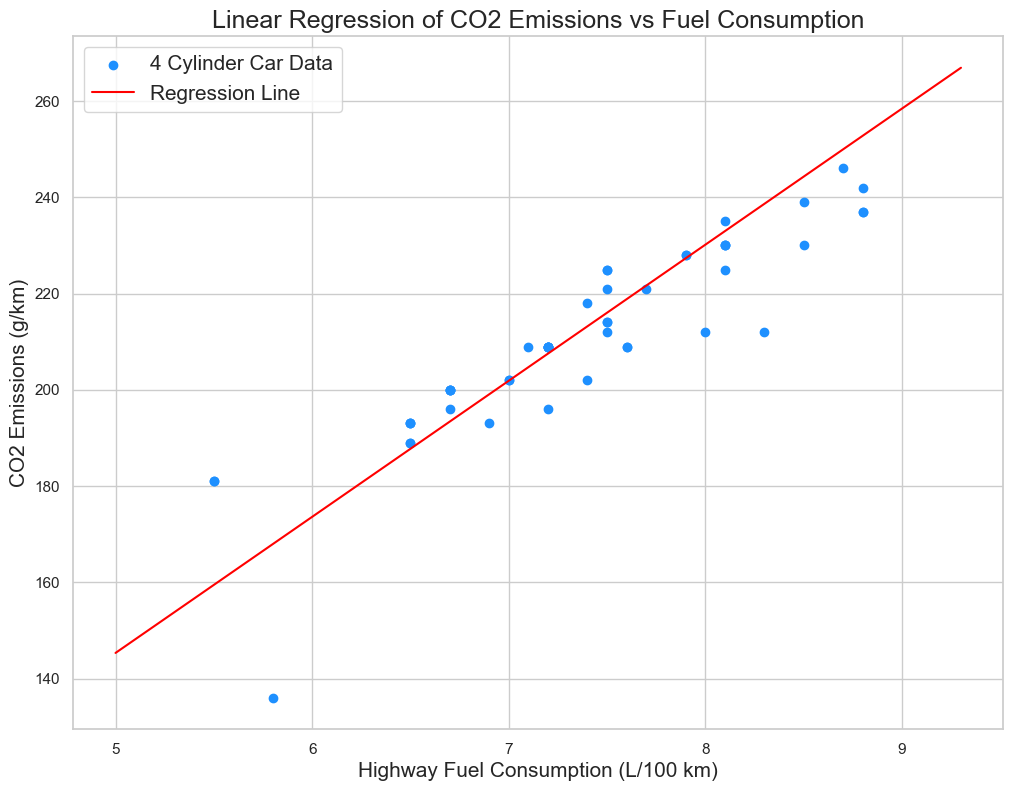

In [38]:
# Generating a range of values for fuel consumption to plot the regression line
domain = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)

# Setting up the plot
plt.figure(figsize=(12, 9))  # Adjusting figure size
plt.scatter(X, y, color="dodgerblue", label="4 Cylinder Car Data")  # Scatter plot of the data
plt.plot(domain, linear_regressor.predict(domain.reshape(-1, 1)), color="red", label="Regression Line")  # Regression line

# Setting labels and title
plt.xlabel("Highway Fuel Consumption (L/100 km)", fontsize=15)
plt.ylabel("CO2 Emissions (g/km)", fontsize=15)
plt.title("Linear Regression of CO2 Emissions vs Fuel Consumption", fontsize=18)

# Adding a legend
plt.legend(fontsize=15)
plt.show()


## Quality of Linear Regression

In the graph above, the regression line does a great job finding an accurate line of best fit. This line is suitable for making predictions about other values.


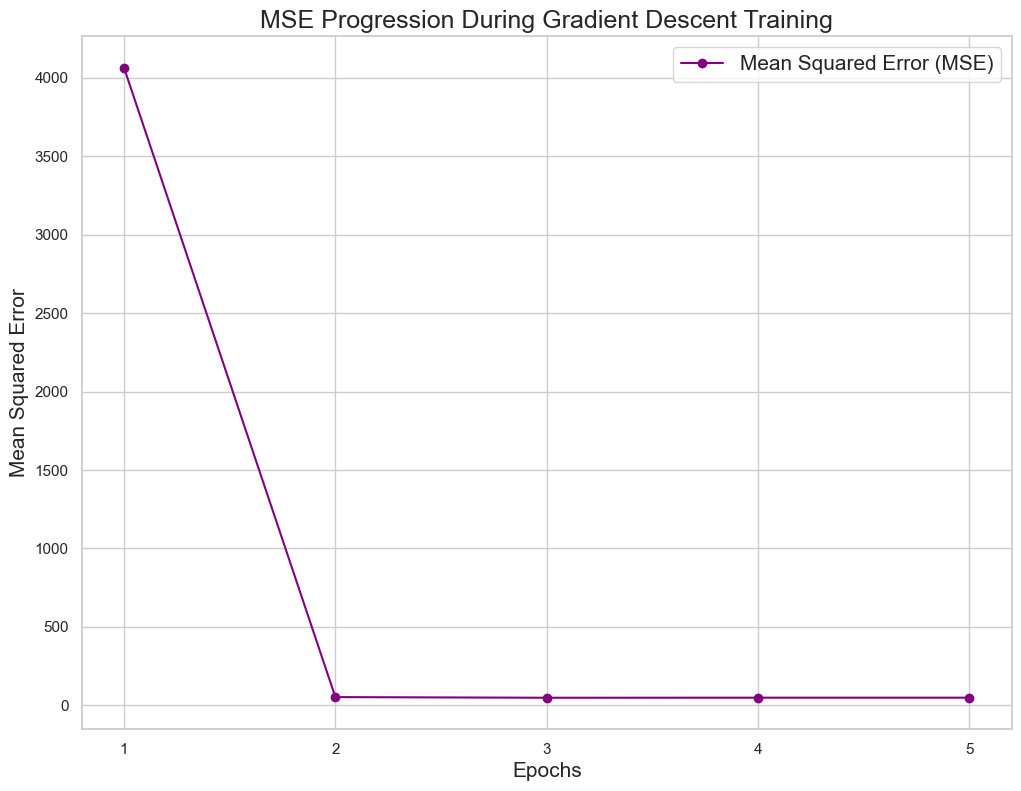

In [39]:
# Change to be mine
plt.figure(figsize=(12, 9))
plt.plot(range(1, len(linear_regressor.errors_) + 1), 
         linear_regressor.errors_,
         marker="o",
         color='purple',
         label="Mean Squared Error (MSE)")

# Setting labels and ticks
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Mean Squared Error", fontsize=15)
plt.xticks(range(1, len(linear_regressor.errors_) + 1))

# Adding a legend and title
plt.legend(fontsize=15)
plt.title("MSE Progression During Gradient Descent Training", fontsize=18)

plt.show()


## Analysis of Mean Squared Error (MSE) Progression

In the graph above, we analyze the progression of the Mean Squared Error (MSE) during the training of the Linear Regression model using the Gradient Descent algorithm. Here are the key insights:

**Alpha Selection**: The analysis highlights that at the current value of the learning rate (alpha), the MSE error is minimized by the second training iteration. This rapid convergence suggests that the chosen alpha value is approximately equal to the initial error. This could lead to problems for a similar but different data set, and a  smaller alpha could still give a better Linear Regression line




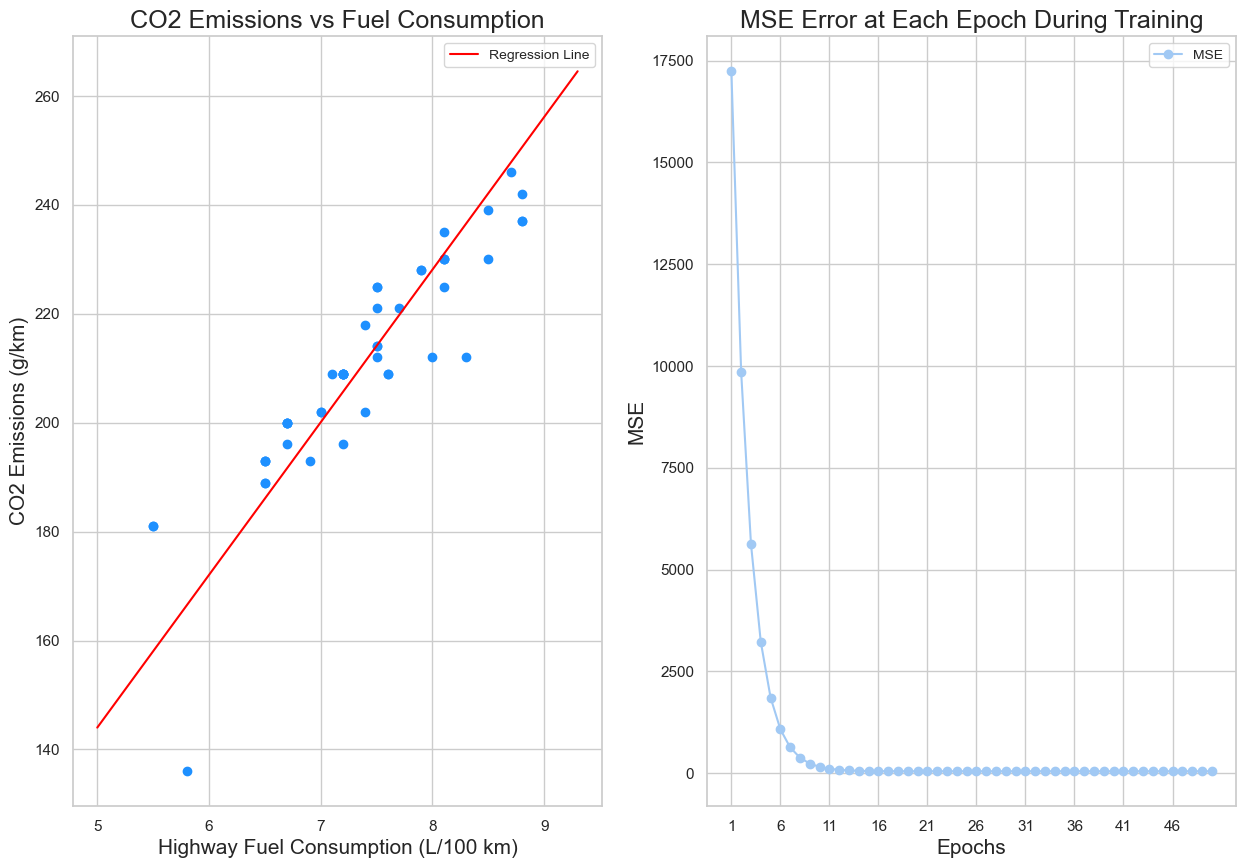

In [44]:
linear_regressor = GradientDescent(linear_activation)  # or GradientDescent if you're using that class
linear_regressor.fit(X, y, alpha=0.0001, epochs=50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Plotting the regression results
ax1.scatter(X, y, color="dodgerblue")
ax1.plot(domain, linear_regressor.predict(domain.reshape(-1, 1)), color="red", label="Regression Line")
ax1.set_xlabel("Highway Fuel Consumption (L/100 km)", fontsize=15)
ax1.set_ylabel("CO2 Emissions (g/km)", fontsize=15)
ax1.set_title("CO2 Emissions vs Fuel Consumption", fontsize=18)
ax1.legend(fontsize=10)

# Plotting the MSE during training
ax2.plot(range(1, len(linear_regressor.errors_) + 1), 
         linear_regressor.errors_,
         marker="o",
         label="MSE")
ax2.set_xlabel("Epochs", fontsize=15)
ax2.set_ylabel("MSE", fontsize=15)
ax2.set_xticks(range(1, len(linear_regressor.errors_) + 1, 5))
ax2.legend(fontsize=10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize=18)

plt.show()


In the visualizations above, we explore the effect of using a smaller alpha (learning rate) in the Gradient Descent algorithm for Linear Regression:

- **Regression Line**: The left plot shows the regression results. With a smaller alpha value, the linear regresion does an equally good job as a predictor.

- **MSE Progression**: The right plot displays the Mean Squared Error (MSE) progression during training. With a smaller alpha, MSE decreases more gradually but eventually reaches a minimum after about 10 epochs.


C:\Users\aweso\AppData\Local\Temp\ipykernel_16664\3819296475.py:21: RuntimeWarning: overflow encountered in double_scalars
  sum_errors += (error ** 2) / 2
C:\Users\aweso\AppData\Local\Temp\ipykernel_16664\3819296475.py:18: RuntimeWarning: invalid value encountered in add
  self.w_[:-1] += alpha * xi * error
C:\Users\aweso\AppData\Local\Temp\ipykernel_16664\3819296475.py:19: RuntimeWarning: invalid value encountered in double_scalars
  self.w_[-1] += alpha * error


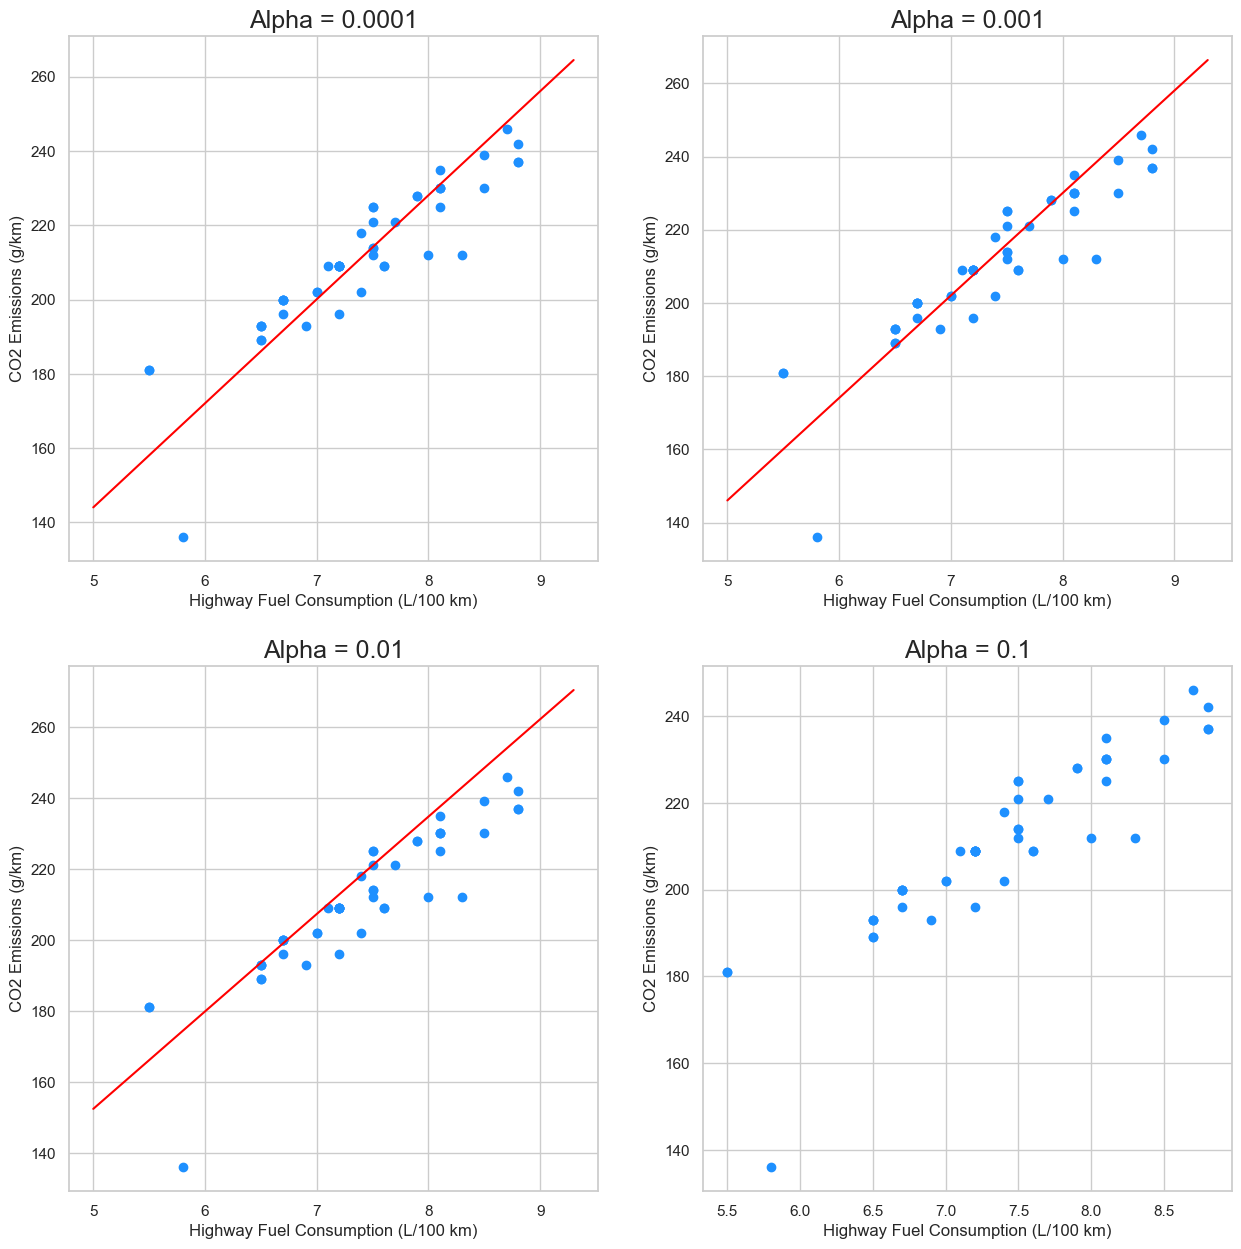

In [51]:
# Possible choices of learning rate 
alphas = [0.0001, 0.001, 0.01, 0.1] 

# Creating a range for plotting the regression line
domain = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    linear_regressor = GradientDescent(linear_activation) 
    linear_regressor.fit(X, y, alpha=alpha, epochs=100)
    
    # Plotting the regression line and data points
    ax.plot(domain, linear_regressor.predict(domain.reshape(-1, 1)), color="red", label="Regression Line")
    ax.scatter(X, y, color="dodgerblue", label="Data Points")
    
    # Setting titles and labels
    ax.set_title(f"Alpha = {alpha}", fontsize=18)
    ax.set_xlabel("Highway Fuel Consumption (L/100 km)", fontsize=12)
    ax.set_ylabel("CO2 Emissions (g/km)", fontsize=12)

plt.tight_layout()
plt.show()


## Impact of Different Alpha Learning Rates

In the visualizations above, we explore the effect of different learning rates (alpha) on the Linear Regression model:

- **Alpha Variation**: We observe four plots, each with a different alpha value (0.0001, 0.001, 0.01, and 0.1).

- **Regression Line Behavior**: Notably, at alpha = 0.1, we observe slight errors, but at smaller alpha values, the regression completely fails to fit the line.

This highlights the sensitivity of the model's performance to the choice of learning rate. An appropriate alpha value is crucial for achieving accurate regression results. An alpha value that is too large will fail to find a line of best fit
